In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy

In [43]:
ord('\0')

0

In [61]:
message = [' ' for i in range(100)]
for i in range(100):
    message[i] = chr(int(ord(' ')+((90<<i) | ord('a')>>i ^ i<<2)%90)) # pseudorandom number
str(message)

'[\'A\', \' \', \'0\', \' \', \'6\', \'7\', \'9\', \'<\', \'@\', \'D\', \'H\', \'L\', \'P\', \'T\', \'X\', \'\\\\\', \'`\', \'d\', \'h\', \'l\', \'p\', \'t\', \'x\', \'"\', \'&\', \'*\', \'.\', \'2\', \'6\', \':\', \'>\', \'B\', \'F\', \'J\', \'N\', \'R\', \'V\', \'Z\', \'^\', \'b\', \'f\', \'j\', \'n\', \'r\', \'v\', \' \', \'$\', \'(\', \',\', \'0\', \'4\', \'8\', \'<\', \'@\', \'D\', \'H\', \'L\', \'P\', \'T\', \'X\', \'\\\\\', \'`\', \'d\', \'h\', \'l\', \'p\', \'t\', \'x\', \'"\', \'&\', \'*\', \'.\', \'2\', \'6\', \':\', \'>\', \'B\', \'F\', \'J\', \'N\', \'R\', \'V\', \'Z\', \'^\', \'b\', \'f\', \'j\', \'n\', \'r\', \'v\', \' \', \'$\', \'(\', \',\', \'0\', \'4\', \'8\', \'<\', \'@\', \'D\']'

In [9]:
data_experiment = list()
latency_experiment = list()
throughput_experiment = list()
experiments = 2
for i in range(experiments):
    data = pd.read_csv("result.csv")
    latency = data[['tamanho(bytes)','latencia(s)']]
    latency_experiment.append(latency)
    throughput = data[['tamanho(bytes)','vazao(bps)']]
    throughput_experiment.append(data)
    data_experiment.append(data)


In [10]:
latency_chart = pd.DataFrame()
latency_chart['tamanho(bytes)'] = data_experiment[0]['tamanho(bytes)']
throughput_chart = pd.DataFrame()
throughput_chart['tamanho(bytes)'] = data_experiment[0]['tamanho(bytes)']
#throughput_chart = pd.DataFrame().append(data_experiment[0]['tamanho(bytes)'].astype('int32').dtypes)
for i in range(experiments):
    latency_chart['latencia(s)'] = latency_experiment[i]['latencia(s)']
    latency_chart = latency_chart.rename(columns={'latencia(s)': f"experimento_{i}"})
    throughput_chart['vazao(bps)'] = throughput_experiment[i]['vazao(bps)']
    throughput_chart = throughput_chart.rename(columns={'vazao(bps)': f"experimento_{i}"})

latency_chart['media'] = latency_chart[latency_chart.columns[1:]].mean(axis=1)
throughput_chart['media'] = throughput_chart[throughput_chart.columns[1:]].mean(axis=1)

Text(0.5, 1.0, 'Vazão x tamanho de mensagem')

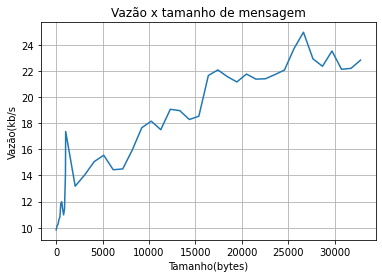

In [12]:
    fig, ax = plt.subplots()
    ax.plot(latency_chart['tamanho(bytes)'], 1000*latency_chart['media'])
    ax.grid(True)
    ax.set_ylabel('Vazão(kb/s')
    ax.set_xlabel('Tamanho(bytes)')
    ax.set_title('Vazão x tamanho de mensagem')

In [21]:
latency_chart_view = latency_chart[['tamanho(bytes)', 'media']]
latency_chart_view=latency_chart_view.rename(columns={"media":"Latência média"}).style.hide_index()
latency_chart_view
latency_chart_view.to_excel("latency_chart_view.xlsx")  

Text(0.5, 1.0, 'Vazão x tamanho de mensagem')

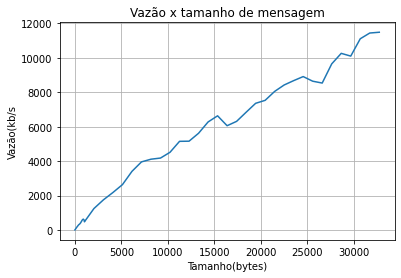

In [82]:
    fig, ax = plt.subplots()
    ax.plot(throughput_chart['tamanho(bytes)'], throughput_chart['media']/1000)
    ax.grid(True)
    ax.set_ylabel('Vazão(kb/s')
    ax.set_xlabel('Tamanho(bytes)')
    ax.set_title('Vazão x tamanho de mensagem')

In [22]:
throughput_chart_view = throughput_chart[['tamanho(bytes)', 'media']]
throughput_chart_view=throughput_chart_view.rename(columns={"media":"Vazão média"}).style.hide_index()
throughput_chart_view
throughput_chart_view.to_excel("throughput_chart_view.xlsx")  

In [23]:
throughput_chart_view

tamanho(bytes),Vazão média
1.000000,813.267373
100.000000,78782.417734
200.000000,155918.774115
300.000000,225539.250251
400.000000,296209.079179
500.000000,337307.566034
600.000000,400287.428612
700.000000,489819.052678
800.000000,582549.016038
900.000000,628697.966511
